# RCS of a 5 cm x 5 cm plate

<a href="https://rookiepeng.github.io/radarsimpy/" target="_blank" rel="nofollow"><img src="https://img.shields.io/badge/Documentation-latest-brightgree?style=flat&logo=read-the-docs" height="20" align="left"></a>

<br></br>
This is example shows how to use [`RadarSimPy`](https://github.com/rookiepeng/radarsimpy) to simulate the RCS of an object based on its 3D model.

---

The plate model is with `.stl`. It can be imported by using `meshio` module. 

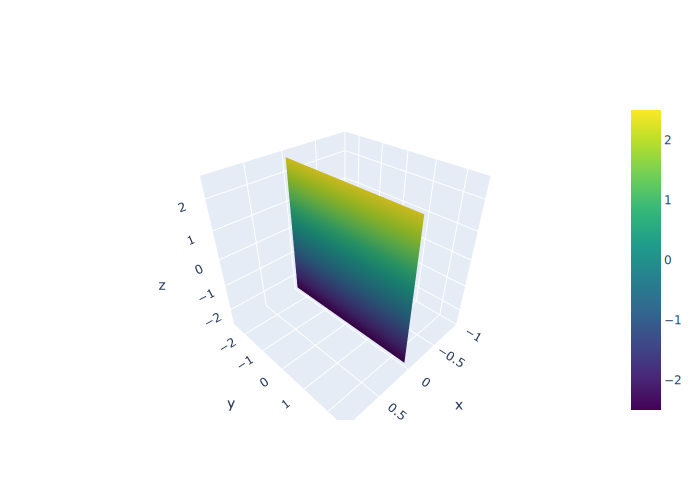

In [1]:
import meshio

import plotly.graph_objs as go
from IPython.display import SVG, display

mesh_data = meshio.read('../models/plate5x5.stl')

fig = go.Figure()

fig.add_trace(go.Mesh3d(x=mesh_data.points[:, 0],
                        y=mesh_data.points[:, 1],
                        z=mesh_data.points[:, 2],
                        i=mesh_data.cells[0].data[:, 0],
                        j=mesh_data.cells[0].data[:, 1],
                        k=mesh_data.cells[0].data[:, 2],
                        intensity=mesh_data.points[:, 2],
                        colorscale='Viridis'
                        ))

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))

### Monostatic

Incident angle and observation angle are the same

In [2]:
import numpy as np
import time

from radarsimpy.rt import rcs_sbr

phi = np.arange(-90, 90, 0.5)
theta = 90
freq = 1e9
pol = [0, 0, 1]
density = 4

rcs = np.zeros_like(phi)

tic = time.time()
for phi_idx, phi_ang in enumerate(phi):
    rcs[phi_idx] = 10 * \
        np.log10(
        rcs_sbr('../models/plate5x5.stl',
                freq,
                phi_ang,
                theta,
                pol=pol,
                density=density)+0.0001)
toc = time.time()

print('Exec time :'+str(toc-tic) + 's')

Exec time :55.37557792663574s


Plot

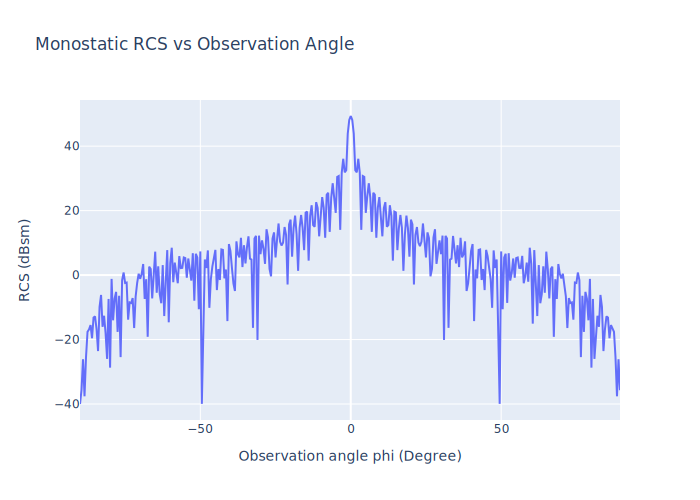

In [3]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=phi, y=rcs))

fig.update_layout(
    title='Monostatic RCS vs Observation Angle',
    yaxis=dict(title='RCS (dBsm)'),
    xaxis=dict(title='Observation angle phi (Degree)'),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))

### Bistatic

Incident angle and observation angle are different

In [4]:
obs_phi = np.arange(-90, 90, 0.5)
obs_theta = 90
freq = 1e9
pol = [0, 1, 0]
density = 1

rcs_vpol = np.zeros_like(obs_phi)
rcs_hpol = np.zeros_like(obs_phi)

inc_phi = 45
inc_theta = 90

tic = time.time()
for phi_idx, phi_ang in enumerate(obs_phi):
    rcs_vpol[phi_idx] = 10 * \
        np.log10(
        rcs_sbr('../models/plate5x5.stl',
                freq,
                phi_ang,
                obs_theta,
                inc_phi=inc_phi,
                inc_theta=inc_theta,
                pol=[0, 0, 1],
                density=density))
    rcs_hpol[phi_idx] = 10 * \
        np.log10(
        rcs_sbr('../models/plate5x5.stl',
                freq,
                phi_ang,
                obs_theta,
                inc_phi=inc_phi,
                inc_theta=inc_theta,
                pol=[0, 1, 0],
                density=density))
toc = time.time()
print('Exec time :'+str(toc-tic) + 's')

Exec time :84.02856206893921s


Plot

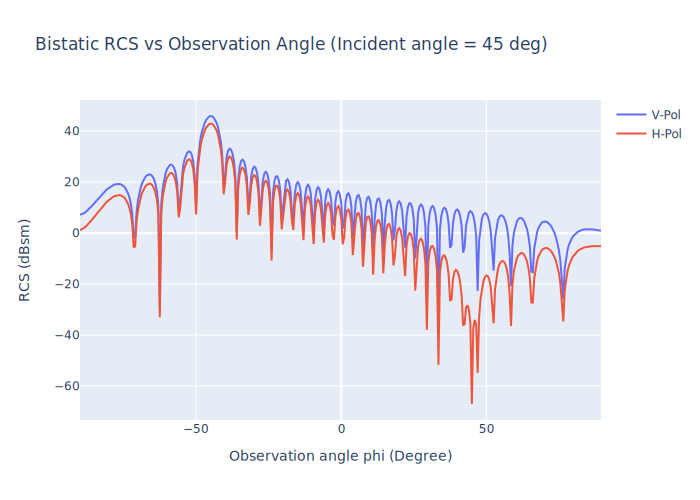

In [5]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=obs_phi, y=rcs_vpol, name='V-Pol'))
fig.add_trace(go.Scatter(x=obs_phi, y=rcs_hpol, name='H-Pol'))

fig.update_layout(
    title='Bistatic RCS vs Observation Angle (Incident angle = 45 deg)',
    yaxis=dict(title='RCS (dBsm)'),
    xaxis=dict(title='Observation angle phi (Degree)'),
)

# fig.show()
display(SVG(fig.to_image(format='svg', scale=1)))